In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#load the dataset 
data = pd.read_csv('user_behavior_dataset.csv')

In [3]:
#show the first five data 
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
# drop the user_id column 
data = data.drop('User ID',axis=1)

In [5]:
# number of features 
data.shape

(700, 10)

In [6]:
# describe the dataset 
data.describe() 

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [7]:
# check for the missing values 
data.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [8]:
# check for the unique values
data.nunique()

Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [9]:
# check for the data types
data.dtypes

Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [10]:
# check for the correlation

corr = data.corr(numeric_only=True)

In [11]:
corr

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


In [12]:
from seaborn import heatmap

<Axes: >

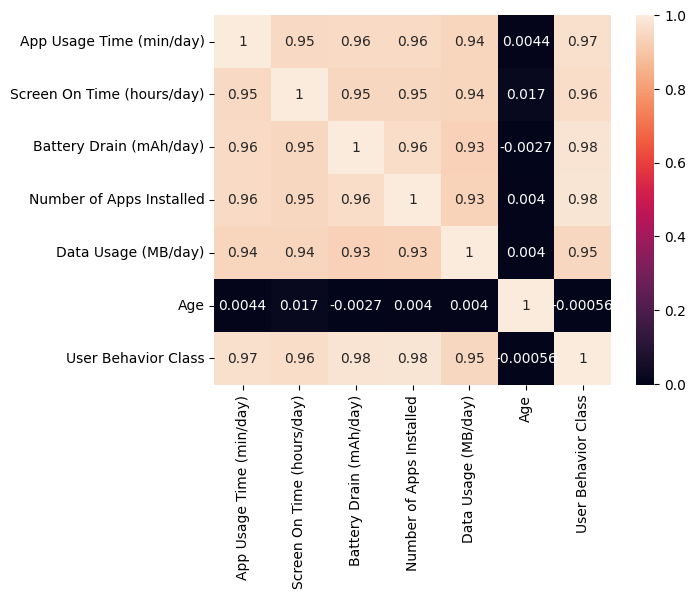

In [13]:
# plot the correlation in heatmap
heatmap(corr, annot=True)

In [14]:
# label encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# filter the categrical columns 
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# create a dictionary to store the label mapping
label_mapping = {}

# apply the label encoding 
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
    label_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# show the label mapping
label_mapping

{'Device Model': {'Google Pixel 5': np.int64(0),
  'OnePlus 9': np.int64(1),
  'Samsung Galaxy S21': np.int64(2),
  'Xiaomi Mi 11': np.int64(3),
  'iPhone 12': np.int64(4)},
 'Operating System': {'Android': np.int64(0), 'iOS': np.int64(1)},
 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}}

In [16]:
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


In [17]:
# number of unique classes 
data['User Behavior Class'].nunique()

5

In [18]:
# prepare the data for training 
X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']

X.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender'],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    classification = classification_report(y_test,y_pred)
    return accuracy,confusion,classification

import io
from pickle import dump
def calculate_model_size(model):
    """Calculate the size of the model in kilobytes"""
    # buffer the model 
    buffer = io.BytesIO()
    dump(model,buffer)
    return buffer.tell()/1024



In [21]:
# create the model 
model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 11,
    random_state = 42
)

## n_estimators = number of tress in the forest
## max_depth = the maximum depth of the tree


In [22]:
# train the model 
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, random_state=42)

In [23]:
# evaluate the model
accuracy,conf_matrix,classification = evaluate_model(model,X_test,y_test)

Accuracy: 1.0



<Axes: >

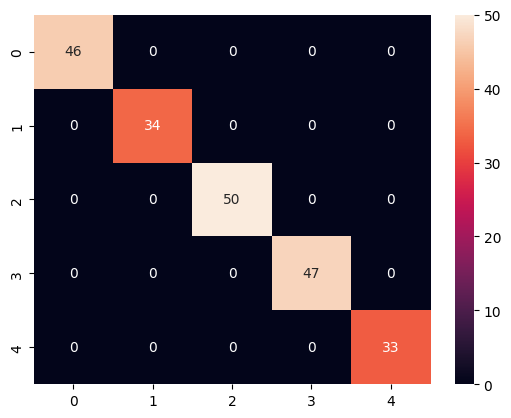

In [24]:
print(f"Accuracy: {accuracy}\n")
heatmap(conf_matrix, annot=True)

In [25]:
# model size 
model_size = calculate_model_size(model)
print(f"Model size: {model_size} KB")

Model size: 143.228515625 KB


 <h5>Our target is to show case the use of subset selection in the dataset  </h5>
<ol>
 <li>to reduce the number of features in the dataset </li>
  <li>to enhance the model performance </li>
  <li>to reduce the training time </li>
  <li>to reduce the complexity of the model </li>
</ol>

<h2>Filter Methods</h2>

In [26]:
# Correlation-based Selection
from sklearn.feature_selection import SelectKBest

In [27]:

# select the best features using the Pearson correlation 
best_features = SelectKBest(k=5)

In [28]:
best_features.fit(X_train, y_train)

SelectKBest(k=5)

In [29]:
# get the selected features
selected_features = X_train.columns[best_features.get_support()]

In [30]:
selected_features

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)'],
      dtype='object')

In [31]:
# train the model with the selected features 

model1 = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 5,
    random_state = 42
)

In [32]:
# train the model
model1.fit(X_train[selected_features],y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [33]:
# evaluate the model
accuracy1,conf_matrix1,classification1 = evaluate_model(model1,X_test[selected_features],y_test)

Accuracy: 1.0



<Axes: >

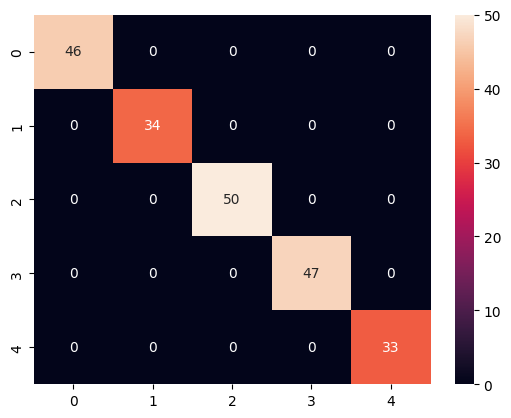

In [34]:
print(f"Accuracy: {accuracy1}\n")
heatmap(conf_matrix1, annot=True)

In [35]:
# model size 
model_size = calculate_model_size(model1)
print(f"Model size: {model_size} KB")

Model size: 125.09375 KB


In [36]:
# reduce the features again 
best_features = SelectKBest(k=3)
best_features.fit(X_train[selected_features], y_train)
new_best_features = X_train[selected_features].columns[best_features.get_support()]

In [37]:
new_best_features

Index(['App Usage Time (min/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed'],
      dtype='object')

In [38]:
# train the model with the selected features
model2 = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 3,
    random_state = 42
)

In [39]:
model2.fit(X_train[new_best_features],y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Accuracy: 1.0



<Axes: >

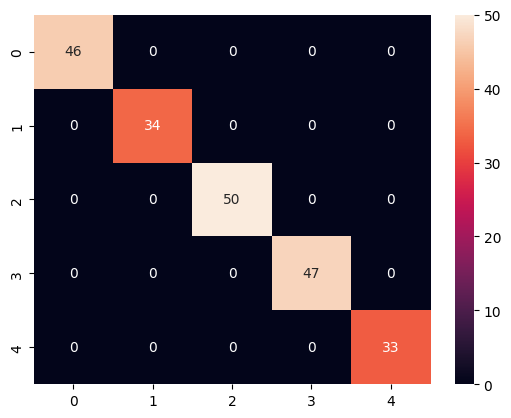

In [40]:
# evaluate the model
accuracy2,conf_matrix2,classification2 = evaluate_model(model2,X_test[new_best_features],y_test)
print(f"Accuracy: {accuracy2}\n")
heatmap(conf_matrix2, annot=True)

In [41]:
# model size
model_size = calculate_model_size(model2)
print(f"Model size: {model_size} KB")

Model size: 117.9345703125 KB


In [42]:
# again reduce the features
best_features = SelectKBest(k=1)
best_features.fit(X_train[new_best_features], y_train)
new_best_features = X_train[new_best_features].columns[best_features.get_support()]

In [43]:
new_best_features

Index(['App Usage Time (min/day)'], dtype='object')

In [44]:
# train the model with the selected features
model3 = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 3,
    random_state = 42
)

In [45]:
model3.fit(X_train[new_best_features],y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Accuracy: 0.9952380952380953



<Axes: >

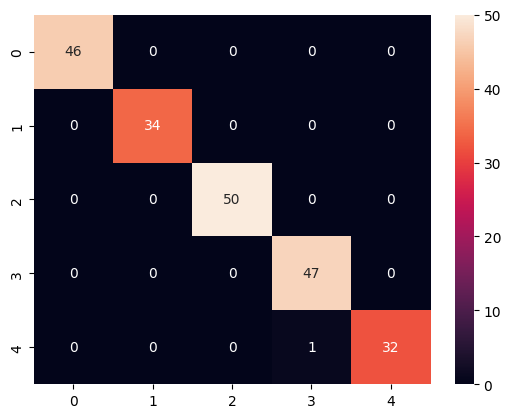

In [46]:
# evaluate the model
accuracy3,conf_matrix3,classification3 = evaluate_model(model3,X_test[new_best_features],y_test)
print(f"Accuracy: {accuracy3}\n")
heatmap(conf_matrix3, annot=True)

In [47]:
# model size
model_size = calculate_model_size(model3)
print(f"Model size: {model_size} KB")

Model size: 117.8818359375 KB



<b>In conclusion we can see,</b><br>
9 features: 143.23 KB, Accuracy: 1<br>
5 features: 125.03 KB, Accuracy: 1<br>
3 features: 117.93 KB, Accuracy: 1<br>
1 feature: 117.88 KB, Accuracy: 0.9952<br>

<h2>Chi-Square Test</h2>

In [48]:
from sklearn.feature_selection import  chi2


In [49]:
# select the best features using the chi2
best_features = SelectKBest(chi2, k=1)

best_features.fit(X_train, y_train)

SelectKBest(k=1, score_func=<function chi2 at 0x7a06c4bddbd0>)

In [50]:
X_train.columns[best_features.get_support()]

Index(['Battery Drain (mAh/day)'], dtype='object')

<h1>Wrapper Methods </h1>

<h2>Forward Selection</h2>

In [51]:
# implement the forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from mlxtend.data import iris_data
# Class labels : {0, 1, 2}, distribution: [50, 50, 50] 0 = setosa, 1 = versicolor, 2 = virginica.

# Dataset Attributes:
#     - 1) sepal length [cm]
#     - 2) sepal width [cm]
#     - 3) petal length [cm]
#     - 4) petal width [cm]

In [52]:
iris_dataset = iris_data() # load the iris dataset
# get the shape of the dataset
iris_dataset[0].shape


(150, 4)

In [53]:
X, y = iris_dataset

In [54]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# create the model
model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 5,
    random_state = 42
)



In [56]:
sfs = SFS(model,k_features=3,forward=True,floating=False,scoring='accuracy',cv=0,verbose=2,)

In [57]:
sfs.fit(X_iris_train,y_iris_train)


[2024-11-27 10:32:02] Features: 1/3 -- score: 0.9428571428571428
[2024-11-27 10:32:02] Features: 2/3 -- score: 0.9809523809523809
[2024-11-27 10:32:02] Features: 3/3 -- score: 1.0

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(max_depth=5,
                                                           random_state=42),
                          k_features=(3, 3), scoring='accuracy', verbose=2)

In [58]:
# get the selected features
selected_features = list(sfs.k_feature_idx_)
selected_features

[0, 2, 3]

In [59]:
# train the model with the selected features 
model4 = RandomForestClassifier()


In [60]:
model4.fit(X_iris_train[:,selected_features],y_iris_train)

RandomForestClassifier()

<Axes: >

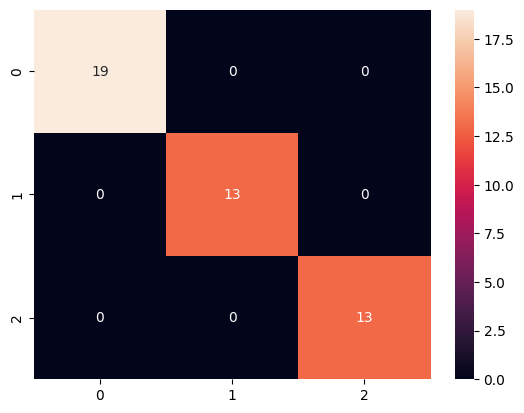

In [61]:
# evaluate the model
accuracy4,conf_matrix4,classification4 = evaluate_model(model4,X_iris_test[:,selected_features],y_iris_test)
heatmap(conf_matrix4, annot=True)


In [62]:
# model size
model_size = calculate_model_size(model4)
print(f"Model size: {model_size} KB")

Model size: 210.375 KB


<h2> Backward Elimination<h2>

In [63]:
# implement the backward selection
sfs = SFS(model,forward=False,floating=False,scoring='accuracy',cv=0,verbose=2,k_features=2)
sfs.fit(X_iris_train,y_iris_train)



[2024-11-27 10:32:04] Features: 3/2 -- score: 1.0
[2024-11-27 10:32:05] Features: 2/2 -- score: 0.9809523809523809

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(max_depth=5,
                                                           random_state=42),
                          forward=False, k_features=(2, 2), scoring='accuracy',
                          verbose=2)

In [64]:
sfs.k_feature_idx_

(2, 3)

<h2>Recursive Feature Elimination (RFE)</h2>

In [65]:
# implement the recursive feature elimination
from sklearn.feature_selection import RFE

In [66]:
model5 = RandomForestClassifier()
rfe = RFE(model5, n_features_to_select=2,verbose=2)

In [67]:
rfe.fit(X_iris_train,y_iris_train,)

Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=2, verbose=2)

In [68]:
# get the selected features
rfe.support_


array([False, False,  True,  True])

In [69]:
rfe.ranking_

array([2, 3, 1, 1])

<h2>Using RandomForestClassifier</h2>

In [70]:
# select the features using the Random Forest
sfm = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
sfm.fit(X_iris_train,y_iris_train)
sfm.feature_importances_

array([0.10461449, 0.04148556, 0.41732594, 0.43657401])

<h1>Embedded Methods</h1>

<h2>Lasso Regression</h2>

In [71]:
# implement the embedded method | Lasso regression
from sklearn.linear_model import Lasso

In [72]:
# create the model
model6 = Lasso(alpha=0.1)
model6.fit(X_iris_train,y_iris_train)

Lasso(alpha=0.1)

In [73]:
model6.coef_

array([ 0.        , -0.        ,  0.40943112,  0.        ])

In [74]:
# select the features with non-zero coefficients 
# data is in array format
selected_features = X_iris_train[:,model6.coef_!=0]


In [75]:
# train the model with the selected features
rmodel6 = RandomForestClassifier()
rmodel6.fit(selected_features,y_iris_train)

RandomForestClassifier()

<Axes: >

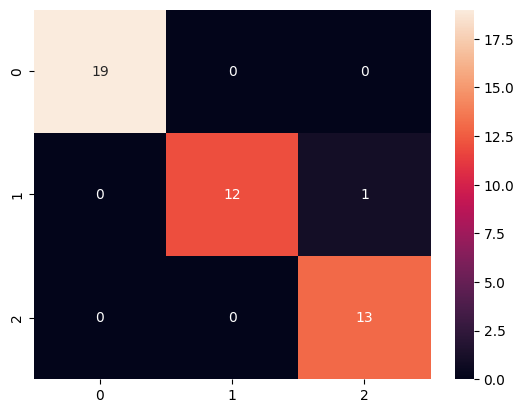

In [76]:
# evaluate the model
accuracy6,conf_matrix6,classification6 = evaluate_model(rmodel6,X_iris_test[:,model6.coef_!=0],y_iris_test)
heatmap(conf_matrix6, annot=True)

In [77]:
# model size
model_size = calculate_model_size(rmodel6)
print(f"Model size: {model_size} KB")
# model size also affected by the n_estimators and max_depth

Model size: 154.669921875 KB
